In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score, classification_report, recall_score, log_loss, precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from xgboost import plot_importance






import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', 200)
pd.set_option('display.max_colwidth', 150)

In [4]:
clean_df = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/Phase_3/cleaned_data.csv')
clean_df.drop(clean_df.filter(regex="Unnamed"),axis=1, inplace=True)
clean_df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,0,1,25,265.100,110,45.070,197.400,99,16.780,244.700,91,11.010,10.000,3,2.700,1,False
1,35,107,0,1,26,161.600,123,27.470,195.500,103,16.620,254.400,103,11.450,13.700,3,3.700,1,False
2,31,137,0,0,0,243.400,114,41.380,121.200,110,10.300,162.600,104,7.320,12.200,5,3.290,0,False
3,35,84,1,0,0,299.400,71,50.900,61.900,88,5.260,196.900,89,8.860,6.600,7,1.780,2,False
4,36,75,1,0,0,166.700,113,28.340,148.300,122,12.610,186.900,121,8.410,10.100,3,2.730,3,False


In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

***

In these next few cells we will prepare the data for modeling by splitting, instantiating and scaling the data. 




***


In [6]:
# Splitting the data and stratifying due to imbalance.

X = clean_df.drop(["churn"], axis=1)
y = clean_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify = y)

#Looking at how the data was shaped
print(X_train.shape, X_test.shape)

# Making sure we have relatively equal percentages for train vs test targets..
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

(2499, 18) (834, 18)
False   0.855
True    0.145
Name: churn, dtype: float64
False   0.855
True    0.145
Name: churn, dtype: float64


In [7]:
#Instantiate a scaler and transform values
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

## Models:

### Logistic Regression
#### Vanilla model:
We will run a few baseline models and see which one is a best fit. First we will start with a logistic regression model and see what the output is.

In [8]:
#Instantiate a LR model, adjusting for weight and fitting it to the scaled data

baseline_lr = LogisticRegression(random_state = 42, class_weight = 'balanced').fit(X_train_scaled, y_train)



In [9]:
# Printing off some baseline metric scores

preds= baseline_lr.predict(X_test_scaled)
probs = baseline_lr.predict_proba(X_test_scaled)

print('*******************')
print('***  BASELINE TEST SCORES ***')
print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds, average = 'weighted'))
print("recall:   ", recall_score(y_test, preds, average = 'weighted'))
print("F1:  ", f1_score(y_test, preds, average = 'weighted'))
print('*******************')

    

*******************
***  BASELINE TEST SCORES ***
log loss:  0.5433464361556094
accuracy:  0.762589928057554
precision: 0.8568219883421259
recall:    0.762589928057554
F1:   0.792376808617657
*******************


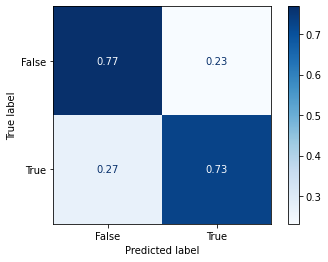

In [10]:
# Displaying a confusion matrix 
plot_confusion_matrix(baseline_lr, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.show()

### Vanilla Model Findings:

The initial vanilla model was no more than a Logistic Regression model. A logistic regression model, simply, is used to estimate the relationship between a dependent and one or more independent variables. In this case we are using it to model the probability of a customer churning.

#### Metrics Findings
The metrics printed off in the previous kernel are used to quantify the performance of the classifiers.
-  log loss is difficult to interpret but generally indicates how close the probability and predictions are, good to use as a baseline and lower is generally better
-  Precision is a straightforward measurement of true positives divided by true negatives
-  Recall is essentially the inverse of precision
-  Accuracy measures both true positives and true negatives by total observations
-  F1 is a harmonic mean of both precision and recall


### Confusion Matrix

A confusion matrix is a good way to evaluate a classifier. In order to understand these matrix results I had the percentages displayed in each quadrant instead of the actual number since the dataset is not balanced. A good model will have a high percentage of True Positives and True Negatives. This initial model accurately predicted True Positives  77% of the time and True Negatives 73% of the time. Not a bad start but we would like to see higher.



### *A Note on Metrics:
A general rule of thumb with metrics is that some are better than others depending on the type of datasets and models you are working with. In our case we have an imbalanced data set and log-loss metrics are usually not used here due to them being difficult to interpret. Additionally, the accuracy score should not be used by itself for the same reason. We also mentioned that F1 is a harmonic mean of both precision and recall, which makes them useful for both imbalanced data sets and working with a binary class,  therefore F1 is the metric we will focus on going forward. 
A good article on using the F1 metric on imbalanced datasets: https://neptune.ai/blog/balanced-accuracy 


### *A Note on Weighted Data:

It should be mentioned that if the imbalance of this dataset was not taken into account when splitting the data and instantiating the logistic regression model, these results would be significantly different and far worse. A good reference article on this topic can be found here:
https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

****
We took a pretty in-depth look at this first model in regards to how it works and what the results mean. We will start to look at other models and classifiers and attempt to tune them to maximum results. 
As mentioned, going forward the metric we will be focusing on is F1.
***

### Choosing a Model:


The classifiers that we will explore in this next step are:
   -  Random Forest: is an ensemble of decision trees, where each tree uses a process called 'Bagging' to ensure each tree is trained on different samples of data.
   
   
   
   -  K-Nearest Neighbors: is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between two points, the more similar they are.
   
   
   
   -  Decision Tree: is a supervised learning method used for classification and regression with the goal of creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
   
These models will be compared along with the Logistic Regression model already created.
  
   

In [11]:
# Finding best classifier:

rf = RandomForestClassifier(class_weight = 'balanced')
knn = KNeighborsClassifier( )
dt = DecisionTreeClassifier(class_weight = 'balanced')

models = [rf, knn, dt, baseline_lr]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_preds_test = model.predict(X_test_scaled)
    training_preds = model.predict(X_train_scaled)
    delta = ((f1_score(y_train, training_preds, average = 'weighted'))-f1_score(y_test, y_preds_test, average = 'weighted'))
    print('Model:', model)
    print('Training F1:', f1_score(y_train, training_preds, average = 'weighted'))
    print('Test F1:', f1_score(y_test, y_preds_test, average = 'weighted'))
    print('F1-Score Delta: {:.3}'.format(delta))
    print('\n****************************\n')
    

Model: RandomForestClassifier(class_weight='balanced')
Training F1: 0.9995996100024539
Test F1: 0.9307137956652592
F1-Score Delta: 0.0689

****************************

Model: KNeighborsClassifier()
Training F1: 0.9214235800337028
Test F1: 0.8821789876750992
F1-Score Delta: 0.0392

****************************

Model: DecisionTreeClassifier(class_weight='balanced')
Training F1: 1.0
Test F1: 0.8947653118648302
F1-Score Delta: 0.105

****************************

Model: LogisticRegression(class_weight='balanced', random_state=42)
Training F1: 0.8040188946869528
Test F1: 0.792376808617657
F1-Score Delta: 0.0116

****************************



***
We are already seeing an improvement in our F1 scores from these classifiers as opposed to our logistic regression model. But we cant always take these numbers at face value, lets look take a deeper look to make sure we are optimal.

-  The training score is how the model generalized or fitted in the training data. If the model fits so well in a data with lots of variance then this causes over-fitting. This causes poor result on Test Score. Because the model curved a lot to fit the training data and generalized very poorly. So, generalization is the goal.
-  The validation test score is still in the experimental part. We keep exploring our model with this data-set. Our model is yet to call the final model in this phase. We keep changing our model until we are satisfied with the validation score we get.
-  The delta is simply the difference between the two, the smaller the delta the better, a low number if a sign of a good fit as opposed to over/under fitting.


***
<h4>Random Forest Confusion Matrix<h4/>

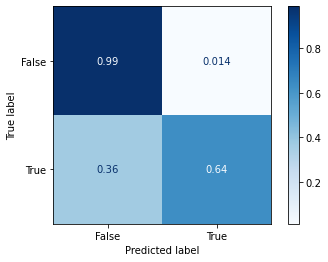

In [12]:
# Displaying a confusion matrix 
plot_confusion_matrix(rf, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)

plt.show()

***
#### K-Nearest Neighbors Confusion Matrix

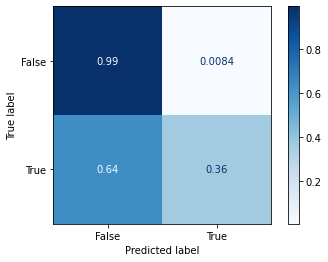

In [13]:
# Displaying a confusion matrix 
plot_confusion_matrix(knn, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)

plt.show()

***
#### Decision Tree Confusion Matrix

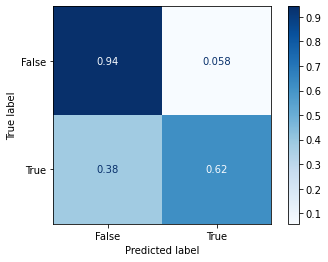

In [14]:
# Displaying a confusion matrix 
plot_confusion_matrix(dt, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)

plt.show()

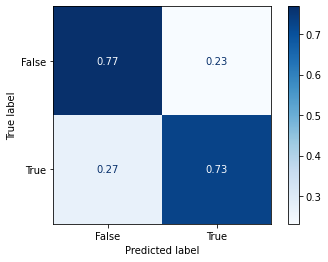

In [15]:
# Displaying a confusion matrix 
plot_confusion_matrix(baseline_lr, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.show()


In [16]:
# Print confusion all in one cell for comparison

rf = RandomForestClassifier(class_weight = 'balanced')
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(class_weight = 'balanced')

models = [rf, knn, dt, baseline_lr]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_preds_test = model.predict(X_test_scaled)
    training_preds = model.predict(X_train_scaled)
    cnf_matrix = confusion_matrix(y_test, y_preds_test, normalize = 'true')
    print('Model:', model)
    print(cnf_matrix)
    print('\n*******************\n')

Model: RandomForestClassifier(class_weight='balanced')
[[0.98737728 0.01262272]
 [0.31404959 0.68595041]]

*******************

Model: KNeighborsClassifier()
[[0.99158485 0.00841515]
 [0.63636364 0.36363636]]

*******************

Model: DecisionTreeClassifier(class_weight='balanced')
[[0.93408135 0.06591865]
 [0.38842975 0.61157025]]

*******************

Model: LogisticRegression(class_weight='balanced', random_state=42)
[[0.76858345 0.23141655]
 [0.27272727 0.72727273]]

*******************



   ### Findings:
   
   We are getting mixed results when looking at both our F1 scores and the confusion matrix. Our Logistic regression model is proving to be a good baseline, it has good F1 scores and does a good job predicting true positives and negatives, but we would like to see some improvements. The Random Forest has a very good F1 score and properly predicts True Negatives an outstanding 99% of the time. As for the True Positives it only correctly predicts them 70% of the time, not bad but we want better. The KNN and Decision Tree classifiers are very similar, but for some reason the KNN confusion matrix is showing poor output of predicting True Positives.

Often times when a method fits the Training Data well but makes poor predictions we say it is Overfit to the Training Data. 

I'm going to tune the KNN model and see if I can get some better results.

### Tuning KNN Classifier

In [17]:
knn2 = KNeighborsClassifier(n_neighbors = 50)

models = [knn2]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_preds_test = model.predict(X_test_scaled)
    training_preds = model.predict(X_train_scaled)
    delta = ((f1_score(y_train, training_preds, average = 'weighted'))-f1_score(y_test, y_preds_test, average = 'weighted'))
    print('2nd Model:', model)
    print('Training F1:', f1_score(y_train, training_preds, average = 'weighted'))
    print('Test F1:', f1_score(y_test, y_preds_test, average = 'weighted'))
    print('F1-Score Delta: {:.3}'.format(delta))
    print('\n****************************\n')

2nd Model: KNeighborsClassifier(n_neighbors=50)
Training F1: 0.8069528491026561
Test F1: 0.8178722646882493
F1-Score Delta: -0.0109

****************************



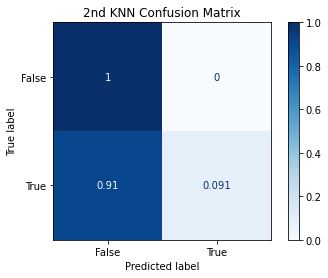

In [18]:
# Displaying a confusion matrix 
plot_confusion_matrix(knn2, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.title('2nd KNN Confusion Matrix')
plt.show()

In [19]:
rf = RandomForestClassifier()
knn3 = KNeighborsClassifier(n_neighbors = 25, metric = 'manhattan')
dt = DecisionTreeClassifier()

models = [knn3]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_preds_test = model.predict(X_test_scaled)
    training_preds = model.predict(X_train_scaled)
    delta = ((f1_score(y_train, training_preds, average = 'weighted'))-f1_score(y_test, y_preds_test, average = 'weighted'))
    print('3rd Model:', model)
    print('Training F1:', f1_score(y_train, training_preds, average = 'weighted'))
    print('Test F1:', f1_score(y_test, y_preds_test, average = 'weighted'))
    print('F1-Score Delta: {:.3}'.format(delta))
    print('\n****************************\n')

3rd Model: KNeighborsClassifier(metric='manhattan', n_neighbors=25)
Training F1: 0.8337012043859454
Test F1: 0.8301718963713495
F1-Score Delta: 0.00353

****************************



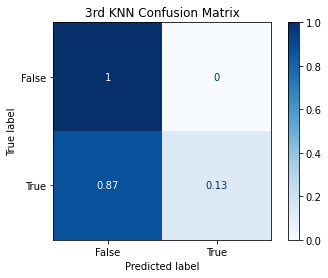

In [20]:
plot_confusion_matrix(knn3, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.title('3rd KNN Confusion Matrix')

plt.show()

Unfortunately it does not seem the KNN model is going to be the classifier we will use.
****

### A Boost
So we are making some progress in terms of finding out which classifiers work best for our case, but it would be remiss to not include one of the newer and most powerful concepts in machine learning right now, XGBoost. 

We mentioned that our classic classifiers use methods like bagging and leaves/branches to create decision trees, but when it comes to XGBoost it also includes a method called Gradient Descent Boosting. A good introduction to this method and algorithms used can be found here: https://www.nvidia.com/en-us/glossary/data-science/xgboost/. 

In [55]:
# Instantiate a baseline XGBClassifier
clf = XGBClassifier(objective = 'binary:logistic', class_weight = 'balanced', random_state = 42)

# Fit XGBClassifier
clf.fit(X_train_scaled, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train_scaled)
test_preds = clf.predict(X_test_scaled)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

[08:52:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training Accuracy: 100.0%
Validation accuracy: 94.84%


In [56]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
clf = XGBClassifier()
models = [rf, knn, dt, clf]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_preds_test = model.predict(X_test_scaled)
    training_preds = model.predict(X_train_scaled)
    delta = ((f1_score(y_train, training_preds, average = 'weighted'))-f1_score(y_test, y_preds_test, average = 'weighted'))
    print('Model:', model)
    print('Training F1:', f1_score(y_train, training_preds, average = 'weighted'))
    print('Test F1:', f1_score(y_test, y_preds_test, average = 'weighted'))
    print('F1-Score Delta: {:.3}'.format(delta))
    print('\n****************************\n')

Model: RandomForestClassifier()
Training F1: 1.0
Test F1: 0.944298746042182
F1-Score Delta: 0.0557

****************************

Model: KNeighborsClassifier()
Training F1: 0.9214235800337028
Test F1: 0.8821789876750992
F1-Score Delta: 0.0392

****************************

Model: DecisionTreeClassifier()
Training F1: 1.0
Test F1: 0.9040033161071438
F1-Score Delta: 0.096

****************************

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Trainin

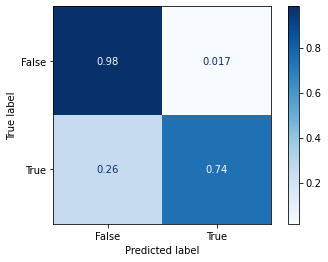

In [23]:
plot_confusion_matrix(clf, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)

plt.show()

Now we are on to something. The XGBoost classifier is giving us the best of both training and test scores and the confusion matrix is looking strong. This looks like the winner. 

For the sake of comparison we will use the XGBoost classifier and RandomForest going forward with our iterations.

***

## Tuning:

Moving forward we will tune and iterate our models and perform grid searches that will ensure optimal results in our search for the best hyperparameters.

There will be a function written to return our new tuned test and training scores and we will take a closer look at the corresponding matrices.

In [24]:
def get_metrics(clf):

    training_preds = clf.predict(X_train_scaled)
    test_preds = clf.predict(X_test_scaled)
    
    #(include weighted scoring due to imbalanced data)
    clf_training_f1 = f1_score(y_train, training_preds, average = 'weighted')
    clf_test_f1 = f1_score(y_test, test_preds, average = 'weighted')
    clf_f1_delta = clf_training_f1 - clf_test_f1

    print('Training F1-Score: {:.3}'.format(clf_training_f1))
    print('Validation Test F1-Score: {:.3}'.format(clf_test_f1))
    print('F1-Score Delta: {:.3}'.format(clf_f1_delta))
    


### Random Forest

In [25]:
#  Parameters to search for the RF classifier

rf_param_grid = {
    'n_estimators': [150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, ],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]}

In [26]:
# Initialize the random forest classifier, run the GridSearch, and fit the data to the model

rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

rf_gs_clf = GridSearchCV(rf, rf_param_grid, scoring = 'f1_weighted')
rf_gs_clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150]},
             scoring='f1_weighted')

In [27]:
(get_metrics(rf_gs_clf))

Training F1-Score: 0.998
Validation Test F1-Score: 0.935
F1-Score Delta: 0.0628


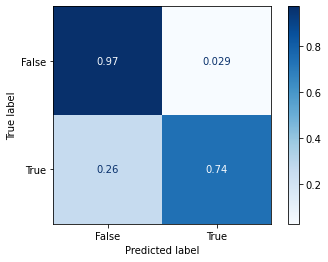

In [28]:
plot_confusion_matrix(rf_gs_clf, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.show()

### XGBoost

In [64]:

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [2, 6, 10],
    'min_child_weight': [0, 1, 2],
    'subsample': [0.3, 0.5, 0.7],
    'n_estimators': [10, 30, 100],
}
    

In [65]:
xgb_clf = XGBClassifier(random_state = 42)

xgb_gs_clf = GridSearchCV(xgb_clf, param_grid, scoring = 'f1_weighted')
xgb_gs_clf.fit(X_train_scaled, y_train)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=

In [31]:
get_metrics(xgb_gs_clf)

Training F1-Score: 0.979
Validation Test F1-Score: 0.941
F1-Score Delta: 0.0378


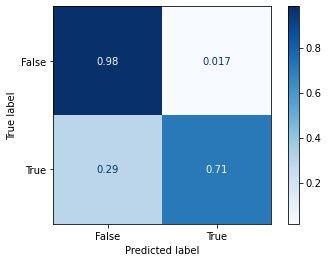

In [32]:
plot_confusion_matrix(xgb_gs_clf, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.show()

### Comparing the new Random Forest and XGBoost results

In [66]:


models = [xgb_gs_clf, rf_gs_clf]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_preds_test = model.predict(X_test_scaled)
    training_preds = model.predict(X_train_scaled)
    delta = ((f1_score(y_train, training_preds, average = 'weighted'))-f1_score(y_test, y_preds_test, average = 'weighted'))
    print('Model:', model)
    print('Training F1:', f1_score(y_train, training_preds, average = 'weighted'))
    print('Test F1:', f1_score(y_test, y_preds_test, average = 'weighted'))
    print('F1-Score Delta: {:.3}'.format(delta))
    print('\n****************************\n')

Model: GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_para

In [34]:
models = [xgb_gs_clf, rf_gs_clf]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_preds_test = model.predict(X_test_scaled)
    training_preds = model.predict(X_train_scaled)
    cnf_matrix = confusion_matrix(y_test, y_preds_test, normalize = 'true')
    print('Model:', model)
    print(cnf_matrix)
    print('\n*******************\n')

Model: GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_para

In [35]:
# Area Under Curve Score

y_preds_test = rf_gs_clf.fit(X_train_scaled, y_train).predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_preds_test)

print('AUC: {}'.format(auc(fpr, tpr)))


AUC: 0.8530420873274374


### Iteration Findings:


After using our GridSearch Features on the 2 models we do not see many significant change to our results. 
The biggest change is our RandomForest Confusion Matrix correctly predicted True Positives 71% of the time as opposed to 65% with the original model.

The XGboost model was mostly unchanged in terms of F1 scores, but the Confusion Matrix produced slightly less desirable results. 

That being said, something important that can be used to distinguish between 2 models that are producing similar output is to look at Type 1 Errors, which is False Positives. So that would be identifying a customer as NOT going to churn when in fact they did. This is detrimental to the company because obviously people leaving costs them money, and if they are misidentifying when they are leaving it will be hard to form a strategy against churn. In our case these 2 models are also very close in this regard, with RandomForest proving slightly better with 28% and XGboost at 29% 



**** 
### Last Iterations:

I believe the RandomForset model is producing very attractive results at this stage, but I would like to tune the parameter to the XGBoost model and create one more iteration just to see if we can put it over the top.



In [36]:
param_grid_1= {
    'max_depth':[4],
    'learning_rate': [0.1,0.5,1],
    'gamma':[0.25],
    'reg_lambda':[10.0, 20, 100],
    'scale_pos_weight': [3]
    
}

In [37]:
xgb_clf_1 = XGBClassifier(random_state = 42)

xgb_gs_clf_1 = GridSearchCV(xgb_clf, param_grid_1, scoring = 'f1_weighted')
xgb_gs_clf_1.fit(X_train_scaled, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=

In [38]:
get_metrics(xgb_gs_clf_1)

Training F1-Score: 1.0
Validation Test F1-Score: 0.948
F1-Score Delta: 0.052


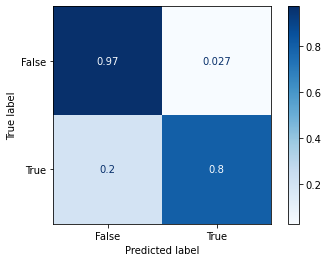

In [39]:
plot_confusion_matrix(xgb_gs_clf_1, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.show()

In [40]:
final_xgb = XGBClassifier(objective='binary:logistic',
                                 seed =42,
                                 subsample=0.9,
                                 colsample_bytree=0.5,
                                 gamma= 0.25,
                                 learn_rate = 0.1,
                                 max_depth = 4,
                                 reg_lambda = 10,
                                 scale_pos_weight =3
                                 )

final_xgb.fit(X_train_scaled,
             y_train,
             verbose= True,
             early_stopping_rounds = 10,
             eval_metric='aucpr',
             eval_set=[(X_test_scaled, y_test)])

[07:56:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.37636
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.53878
[2]	validation_0-aucpr:0.67696
[3]	validation_0-aucpr:0.73002
[4]	validation_0-aucpr:0.78857
[5]	validation_0-aucpr:0.79244
[6]	validation_0-aucpr:0.79720
[7]	validation_0-aucpr:0.80625
[8]	validation_0-aucpr:0.79890
[9]	validation_0-aucpr:0.79559
[10]	validation_0-aucpr:0.77994
[11]	validation_0-aucpr:0.78174
[12]	validation_0-aucpr:0.78386
[13]	validation_0-aucpr:0.79772
[14]	validation_0-aucpr:0.80370
[15]	validation_0-aucpr:0.80848
[16]	validation_0-aucpr:0.81400
[17]	valida

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [41]:
get_metrics(final_xgb)

Training F1-Score: 0.98
Validation Test F1-Score: 0.948
F1-Score Delta: 0.0319


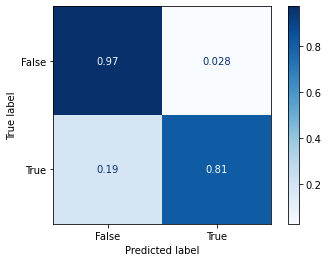

In [42]:
plot_confusion_matrix(final_xgb, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.show()

In [43]:
# Getting the Area Under Curve Score

y_preds_test = final_xgb.fit(X_train_scaled, y_train).predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_preds_test)

print('AUC: {}'.format(auc(fpr, tpr)))


[07:56:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


AUC: 0.8909334322441551


### Evaluation:

    
 Our last model is still showing a strong F1 score, albeit a little lower than the previous 2 models. But what we did see an improvement in is the Type 1 error of False Positives dropped to 19% and it also showed an increase in predicting true positives at 81%. 

***

The final XGBClassifier model will be the model that we choose to move forward with, we will go over the reasons why.
-  F1: The final F1 scores were technically slightly lower than the some of the other models but still very strong.  We see with the delta that the scores are very close together which may indicate slight overfitting which XGB tends to do, but the numbers are not too good to be true which is promising that the model still has a very good fit and we took several precautions with our models to help avoid the issue. 

- Confusion Matrix: This is where I made the decision to pick this model. The correct prediction of True Negatives at over 96% is incredibly strong and close to the other models, but the 81% of correctly predicting True Positives is significantly stronger than the other choices. It was also showed an improvement of predicting Type 1 errors at 19%. As mentioned earlier, from an economical perspective this has the potential to save the company money.

-  According to the Sklearn XGBoost manual, with an imbalanced data set a good evaluator of the model is the Area Under Curve score, which came in at a strong 89%. Anything at 90% or above is considered excellent, so we are happy with this score and is another indicator that this is a good model. 



***
### Feature Importance:
Now that are model is finalized we will run a function that will show the order of featured based on importance according to the model. This will be very important for the company when making a strategy to combat customer churn.

In [44]:
def plot_feature_importances(model):
    sns.set_theme(style = "whitegrid")
    
    pd.Series(model.feature_importances_,
              index = X_train.columns).nlargest(10).sort_values(ascending = True).plot(kind = 'barh')
    

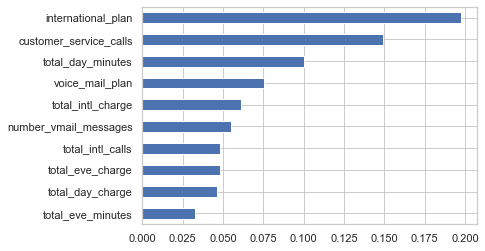

In [45]:
plot_feature_importances(final_xgb)

### Conclusion

XGBoost uses supervised learning to create parallel tree boosting models that have proven to be some of the fastest and most accurate in the industry. From our model we created a strong F1 score, which as mentioned earlier, is good for both imbalanced data sets and binary classes. Also noted was that according to the XGBoost manual the AUC score is one of the best evaluators of the model. Both our F1 and AUC scores were strong and show minimal overfitting which we attempted to avoid by addressing the imbalance by paying attention to items such as 'class_weight' and 'scale_pos_weight'. The confusion matrix is a very important tool in our modeling, but can sometimes turn into a pick your poison scenario. Very rarely will all the quadrants meet your expectations as tuning the model may improve one quadrant at the expense of another. Therefore a decision must be made specific to the business problem at hand. That is why in our case I selected the model with the lowest type 1 error since the entire business problem is based around avoiding customers leaving. We want to be able to predict what is making customers leave to create an optimal strategy, with as few customers as possible slipping through the cracks.

For future work it would be beneficial to continue to add to the dataset to keep a track of current trends. It would also be helpful to know more information pertaining to the more important features of the model, for example:
-  How much extra does the voicemail plan cost for customers and what is the profit margin for the company
-  What is the average length of time a customer spends on the phone with customer service

A customer survey could also be a good idea.

In [71]:
#                            Appendix/Notes:

# XGB Notes

# binary:logistic: logistic regression for binary classification, output probability

# Early stopping rounds = 10 means if after 10 iterations no improvement model stops running

# scale_pos_weight = adds penalty for incorrectly classifing minority class, helps with imbalanced data

# gamma = pruning - larger it is the more conservative the algo will be 

# AUC for imbalanced data to eval performance of fit and use scale_pos_weight

# verbose = printing info , 2 gives message

#subsample = default is 1, at .9 means it randomly samplys 90% of data before growing tree, 
#lower than default helps preven overfitting

# colsample ratio of columns when constructing the tree, 50 helps speed and overfitting 

# missing = None , what character represents missing values, default to 0

# XGBoost tutorial = https://statquest.org/